In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import pandas as pd
import datetime as dt

JST = 'days since 1968-05-23 09:00:00 GMT'


def rmse1(varid, date_range, obsfile, freefile, assifile=None):

    time_range = netCDF4.date2num(date_range, JST)
    obs = netCDF4.Dataset(obsfile, 'r')
    free = netCDF4.Dataset(freefile, 'r')
    if assifile is not None:
        assi = netCDF4.Dataset(assifile, 'r')

    time = obs.variables['obs_time'][:]
    index = np.where((time >= time_range[0]) & (time <= time_range[1]))
    
    time = netCDF4.num2date(time[index], JST)
    x_f = free.variables['NLmodel_value'][index]
    if assifile is not None:
        x_a = assi.variables['NLmodel_value'][index]
    y = obs.variables['obs_value'][index]
    type = obs.variables['obs_type'][index]
    depth = obs.variables['obs_depth'][index]
    station = obs.variables['obs_station'][index]
    
    data = {'station': station, 'depth': depth, 'type': type, 'x_f': x_f, 'y': y}
    if assifile is not None:
        data['x_a'] = x_a
    df = pd.DataFrame(data, index=time)
    df = df[df.x_f<999.9]
    df = df[df.x_f>0.0]
    df = df[df.type==varid]
    #df = df[df.station==1]

    df['error_f'] = df.y - df.x_f
    df['SE_f'] = df.error_f ** 2
    if assifile is not None:
        df['error_a'] = df.y - df.x_a
        df['SE_a'] = df.error_a ** 2
    
    #print df.head(30)
    
    df = df.resample('H', how='mean')
    df['RMSE_f'] = np.sqrt(df.SE_f)
    df.RMSE_f.plot()
    if assifile is not None:
        df['RMSE_a'] = np.sqrt(df.SE_a)
        df.RMSE_a.plot()

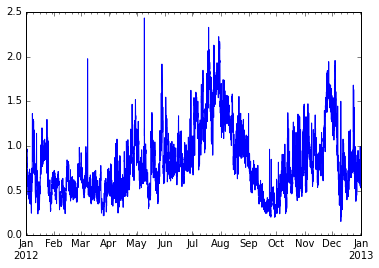

In [3]:
freefile = 'Z:/roms/Apps/OB500_fennelP/NL07/ob500_mod.nc'
obsfile = 'F:/okada/Dropbox/Data/ob500_obs_2012_obweb-3.nc'

varid = 6
date_range = [dt.datetime(2012,1,1,0), dt.datetime(2013,1,1,0)]

rmse1(varid, date_range, obsfile, freefile)

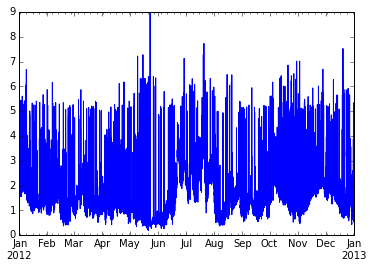

In [4]:
rmse1(7, date_range, obsfile, freefile)

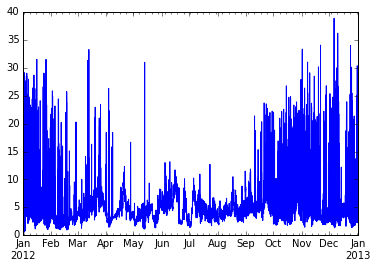

In [5]:
rmse1(10, date_range, obsfile, freefile)

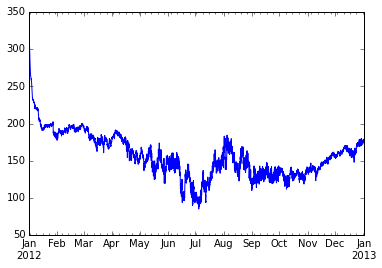

In [6]:
rmse1(15, date_range, obsfile, freefile)

/Users/teruhisa/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/teruhisa/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


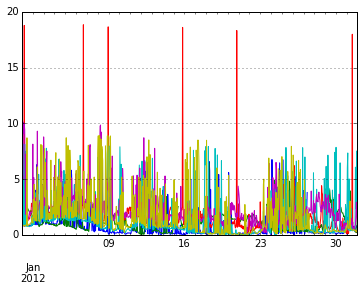

In [9]:
def rmse2(obsfile, modfile, varid, drange):

    mod = netCDF4.Dataset(modfile, 'r')
    obs = netCDF4.Dataset(obsfile, 'r')
    trange = netCDF4.date2num(drange, tunit_JST)

    time = obs.variables['obs_time'][:]
    index = np.where((time > trange[0]) & (time < trange[1]))
    
    time = netCDF4.num2date(time[index], tunit_JST)
    x = mod.variables['NLmodel_value'][index]
    y = obs.variables['obs_value'][index]
    type = obs.variables['obs_type'][index]
    depth = obs.variables['obs_depth'][index]
    station = obs.variables['obs_station'][index]
    
    data = {'station': station, 'depth': depth, 'type': type, 'x': x, 'y': y}
    df = pd.DataFrame(data, index=time)
    df = df[df.x<999.9]
    df = df[df.x>1.0]
    df = df[df.type==varid]
    
    for s in [3,4,5,6,12,13]:
        sta = df[df.station==s]
        sta['error'] = sta.y - sta.x
        sta['SE'] = sta.error ** 2

        #print df.head(30)

        sta = sta.resample('', how='mean')
        sta['RMSE'] = np.sqrt(sta.SE)
        sta.RMSE.plot()
    
obsfile = '/Users/teruhisa/Dropbox/Data/ob500_obs_2012_obweb-2.nc'
modfile = '/Users/teruhisa/mnt/apps/OB500_fennelP/NL03/ob500_mod.nc'
varid = 7
drange = [dt.datetime(2012,1,1,0), dt.datetime(2012,2,1,0)]

rmse2(obsfile, modfile, varid, drange)

In [ ]:
rmse2(obsfile, modfile, 10, drange)